In [1]:
!pip install fastapi uvicorn python-multipart pytesseract opencv-python-headless aiofiles nest-asyncio
!apt-get install -y tesseract-ocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


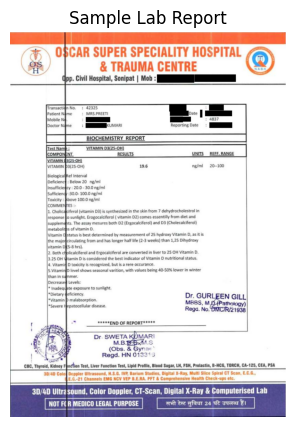

In [6]:
import os
import cv2
from matplotlib import pyplot as plt

extract_path = '/content/drive/MyDrive/lab_reports_samples/lbmaske'

# Filter only valid image files
valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
image_files = [f for f in os.listdir(extract_path) if f.lower().endswith(valid_extensions)]

# Get the first image path
sample_image_path = os.path.join(extract_path, image_files[0]) if image_files else None

# Read and display the image
if sample_image_path:
    image = cv2.imread(sample_image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Sample Lab Report")
    plt.show()
else:
    print("No image files found in the folder.")


In [5]:
!pip install pytesseract
!sudo apt install tesseract-ocr

import pytesseract
import cv2
import os

def extract_text(image_path):
    img = cv2.imread(image_path)
    text = pytesseract.image_to_string(img)
    return text

image_paths = [os.path.join(extract_path, img)
               for img in os.listdir(extract_path)
               if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Total Images Found: {len(image_paths)}")
for path in image_paths[:5]:
    print(f"Processing {path}")
    text = extract_text(path)
    print(text[:300])
    print("="*50)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Total Images Found: 426
Processing /content/drive/MyDrive/lab_reports_samples/lbmaske/GUR-0425-PA-0053434_Q-PREETI4837000111zon_250427_1314@F.pdf_page_38.png
 
 
   
    
   
 
   
 
 
    
  
   
 
 

/\ OSCAR SUPER SPECIALITY HOSPITAL

\ Sh & TRAUMA CENTRE a
pp. Civil Hospital, Sonipat | Mob :

: 42325
: MRS.PREETI

hm!
: ER Kumari

   

ng/ml =. 20--100

  
  

response fo sunlight. Erogocalciferol ( vitamin D2) comes essentilly from diet and
suppleme
Processing /content/drive/MyDrive/lab_reports_samples/lbmaske/GUR-0425-PA-0053405_Q-RANJANADEVI21.04.20250001compressed_250427_1041@F.pdf_page_42.png
SWASTIK HOSPITAL

Jhajjar Road, Bahadurgarh

The Skill Ta Heat

 
  

Sample Accepted at
| f p

Test Authenticated at : NII 8:20:37 | Ref. By

HORMONES& MARKERS

 

MN

In [7]:
import re

def parse_lab_report(text):
    results = []

    pattern = re.compile(r'([A-Za-z ()%]+)\s+([\d.]+(?:\.\d+)?)\s+([\d.]+-[\d.]+)\s*([a-zA-Z/%]+)?')

    for match in pattern.finditer(text):
        test_name = match.group(1).strip()

        try:
            test_value = float(match.group(2))
        except ValueError:
            print(f"Warning: Could not convert '{match.group(2)}' to float for test: {test_name}")
            continue

        reference_range = match.group(3)
        unit = match.group(4) if match.group(4) else ""

        ref_min, ref_max = map(float, reference_range.split("-"))
        out_of_range = not (ref_min <= test_value <= ref_max)

        results.append({
            "test_name": test_name,
            "test_value": str(test_value),
            "bio_reference_range": reference_range,
            "test_unit": unit,
            "lab_test_out_of_range": out_of_range
        })

    return results

In [8]:
all_results = []

for path in image_paths[:100]:
    print(f"extracting files: {os.path.basename(path)}")
    raw_text = extract_text(path)
    structured_data = parse_lab_report(raw_text)

    all_results.append({
        "file_name": os.path.basename(path),
        "is_success": True if structured_data else False,
        "data": structured_data
    })

extracting files: GUR-0425-PA-0053434_Q-PREETI4837000111zon_250427_1314@F.pdf_page_38.png
extracting files: GUR-0425-PA-0053405_Q-RANJANADEVI21.04.20250001compressed_250427_1041@F.pdf_page_42.png
extracting files: BLR-0425-PA-0041660_KAUSHAL REPORTS_27-04-2025_1009-13_AM@E.pdf_page_10.png
extracting files: BLR-0425-PA-0041171_MEKHA LAMBA STAY LETTER_26-04-2025_0253-30_PM@E.pdf_page_24.png
extracting files: GUR-0425-PA-0057871_F-image67213_250427_1140@G.pdf_page_10.png
extracting files: CHE-0425-PA-0013910_F-MR._TANUJ_JAIN_1_250423_1230@G.pdf_page_21.png
extracting files: GUR-0425-PA-0051495_Q-FINAL0001_250427_1709@F.pdf_page_53.png
extracting files: GUR-0425-PA-0057956_F-DIPENDRABHATTPREAUTHREQ0001_250427_1509@G.pdf_page_10.png
extracting files: KOC-0425-PA-0009630_Q-AnilCasesheet_250427_1458@F.pdf_page_21.png
extracting files: GUR-0425-PA-0055247_Q-Muraliquery_250427_1736@F.pdf_page_5.png
extracting files: GUR-0425-PA-0049547_Q-BECHUIPD1104_250424_1548@F.pdf_page_32.png
extracting fil

In [9]:
import json

print(json.dumps(all_results[1], indent=2
))


{
  "file_name": "GUR-0425-PA-0053405_Q-RANJANADEVI21.04.20250001compressed_250427_1041@F.pdf_page_42.png",
  "is_success": false,
  "data": []
}


In [10]:
import json


for result in all_results:
  if result['is_success']:
    print(json.dumps(result, indent=3))


{
   "file_name": "GUR-0425-PA-0057956_F-DIPENDRABHATTPREAUTHREQ0001_250427_1509@G.pdf_page_10.png",
   "is_success": true,
   "data": [
      {
         "test_name": "Apr",
         "test_value": "2025.0",
         "bio_reference_range": "09-40",
         "test_unit": "Receiving",
         "lab_test_out_of_range": true
      }
   ]
}
{
   "file_name": "KOC-0425-PA-0009630_Q-AnilCasesheet_250427_1458@F.pdf_page_21.png",
   "is_success": true,
   "data": [
      {
         "test_name": "FLOW CYTOMETRY AND",
         "test_value": "14.0",
         "bio_reference_range": "25-50",
         "test_unit": "%",
         "lab_test_out_of_range": true
      },
      {
         "test_name": "FLOW CYTOMETRY AND",
         "test_value": "7.0",
         "bio_reference_range": "2-10",
         "test_unit": "%",
         "lab_test_out_of_range": false
      }
   ]
}
{
   "file_name": "GUR-0425-PA-0049547_Q-BECHUIPD1104_250424_1548@F.pdf_page_32.png",
   "is_success": true,
   "data": [
      {
       

In [11]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
import shutil, nest_asyncio
import traceback

nest_asyncio.apply()
app = FastAPI()

@app.post("/get-lab-tests")
async def get_lab_tests(file: UploadFile = File(...)):
    try:
        tmp = f"/content/{file.filename}"
        with open(tmp, "wb") as buf:
            shutil.copyfileobj(file.file, buf)
        text = extract_text(tmp)
        data = parse_lab_report(text)
        return JSONResponse({"is_success": True, "data": data})
    except Exception as e:
        traceback.print_exc()
        return JSONResponse({"is_success": False, "error": str(e)}, status_code=500)

In [15]:
!pip install fastapi uvicorn pyngrok nest_asyncio python-multipart opencv-python pytesseract

from fastapi import FastAPI, File, UploadFile
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
import os
import pytesseract
import cv2
import re
import nest_asyncio
from pyngrok import ngrok
import shutil

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

def extract_text(image_path):
    img = cv2.imread(image_path)
    text = pytesseract.image_to_string(img)
    return text

def parse_lab_report(text):
    result = []
    lines = text.split('\n')
    for line in lines:
        match = re.match(r"([A-Za-z ]+)\s+([\d.]+)\s+([A-Za-z/%]+)?\s+([\d.-]+)-([\d.-]+)", line)
        if match:
            name = match.group(1).strip()
            value = float(match.group(2))
            unit = match.group(3)
            low = float(match.group(4))
            high = float(match.group(5))
            result.append({
                "test_name": name,
                "value": value,
                "unit": unit,
                "bio_reference_range": f"{low}-{high}",
                "lab_test_out_of_range": value < low or value > high
            })
    return result

@app.post("/get-lab-tests")
async def get_lab_tests(file: UploadFile = File(...)):
    try:
        with open(file.filename, "wb") as buffer:
            shutil.copyfileobj(file.file, buffer)

        raw_text = extract_text(file.filename)
        structured_data = parse_lab_report(raw_text)
        os.remove(file.filename)

        return {
            "file_name": file.filename,
            "is_success": True,
            "data": structured_data
        }
    except Exception as e:
        return {"is_success": False, "error": str(e)}

nest_asyncio.apply()
public_url = ngrok.connect(8000)
print("🚀 Your FastAPI endpoint is:", public_url)

uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [354]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


🚀 Your FastAPI endpoint is: NgrokTunnel: "https://dc5a-34-91-97-229.ngrok-free.app" -> "http://localhost:8000"


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [354]


In [14]:
from pyngrok import ngrok
!ngrok config add-authtoken '2wOKtQdxw3Ef8wN9nIDVbOd5T49_3dU1Z4SK2foXKqCeSsDex'

public_url = ngrok.connect(8000)
print("FastAPI endpoint:", public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
FastAPI endpoint: NgrokTunnel: "https://7f95-34-91-97-229.ngrok-free.app" -> "http://localhost:8000"


In [16]:
@app.post("/get-lab-tests")
async def get_lab_tests(file: UploadFile = File(...)):
    with open(file.filename, "wb") as buffer:
        buffer.write(await file.read())
    try:
        raw_text = extract_text(file.filename)
        structured_data = parse_lab_report(raw_text)
        os.remove(file.filename)

        return {
            "file_name": file.filename,
            "is_success": True,
            "data": structured_data
        }
    except Exception as e:
        os.remove(file.filename)
        return {"is_success": False, "error": str(e)}

nest_asyncio.apply()

from threading import Thread

def run():
    uvicorn.run(app, host="0.0.0.0", port=8000)

Thread(target=run).start()

public_url = ngrok.connect(8000)
print(f"Your FastAPI app is live at: {public_url}/get-lab-tests")

INFO:     Started server process [354]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


Your FastAPI app is live at: NgrokTunnel: "https://63c4-34-91-97-229.ngrok-free.app" -> "http://localhost:8000"/get-lab-tests


In [17]:
!pip install pyngrok -q
from pyngrok import ngrok


In [18]:
from google.colab import files

uploaded = files.upload()

filename = next(iter(uploaded))

import requests

ngrok_url = "https://317a-34-16-198-81.ngrok-free.app/get-lab-tests"

files = {'file': open(filename, 'rb')}
response = requests.post(ngrok_url, files=files)

print(response.json())

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-1' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    se

Saving BLR-0425-PA-0039192_E-PareshwarFinalBill_250427_1337@E.pdf_page_99.png to BLR-0425-PA-0039192_E-PareshwarFinalBill_250427_1337@E.pdf_page_99.png
{'file_name': 'BLR-0425-PA-0039192_E-PareshwarFinalBill_250427_1337@E.pdf_page_99.png', 'is_success': True, 'data': []}


In [19]:
import json

def pretty_print_json(json_data):
    print(json.dumps(json_data, indent=4))

pretty_print_json(response.json())


{
    "file_name": "BLR-0425-PA-0039192_E-PareshwarFinalBill_250427_1337@E.pdf_page_99.png",
    "is_success": true,
    "data": []
}


In [22]:
from google.colab import files

uploaded = files.upload()

filename = next(iter(uploaded))

import requests

ngrok_url = "https://63c4-34-91-97-229.ngrok-free.app"

files = {'file': open(filename, 'rb')}
response = requests.post(ngrok_url, files=files)

print(response.json())

Saving GUR-0425-PA-0056771_GUR0425PA0056771_PA_27-04-2025_0235-32_PM@E.pdf_page_14.png to GUR-0425-PA-0056771_GUR0425PA0056771_PA_27-04-2025_0235-32_PM@E.pdf_page_14.png
INFO:     34.91.97.229:0 - "POST / HTTP/1.1" 404 Not Found
{'detail': 'Not Found'}


In [21]:
import json

def pretty_print_json(json_data):
    print(json.dumps(json_data, indent=4))

pretty_print_json(response.json())

{
    "file_name": "BLR-0425-PA-0036693_ARVIND REDDY REPALA 0036693_28-04-2025_1120-45_AM@E.pdf_page_24.png",
    "is_success": true,
    "data": []
}
